In [1]:
#import libraries
import numpy as nm  
import matplotlib.pyplot as mtp  
import pandas as pd  

In [2]:
#importing datasets  
data_set= pd.read_csv('User_Data.csv')  
  
#Extracting Independent and dependent Variable  
x= data_set.iloc[:, [2,3]].values  
y= data_set.iloc[:, 4].values  

In [3]:
data_set

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

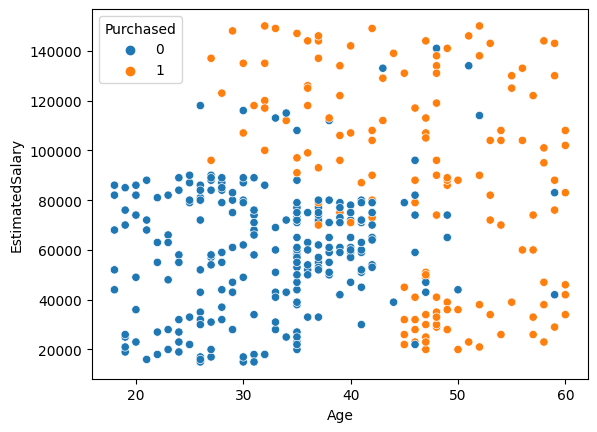

In [4]:
import seaborn as sns
sns.scatterplot(data=data_set,x='Age',y='EstimatedSalary',hue='Purchased')

In [5]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)     

<AxesSubplot:>

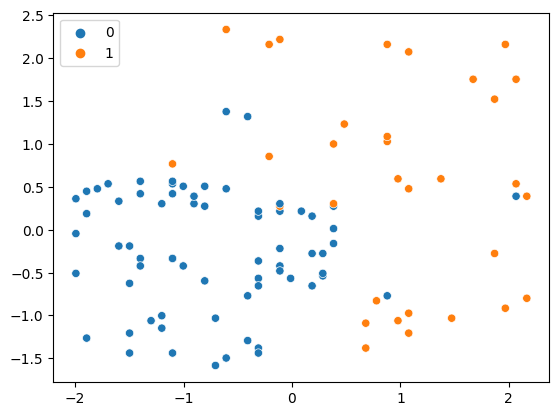

In [6]:
sns.scatterplot(x=x_test[:,0],y=x_test[:,1],hue=y_test)

In [24]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(x_train, y_train)  

SVC(kernel='linear', random_state=0)

<AxesSubplot:>

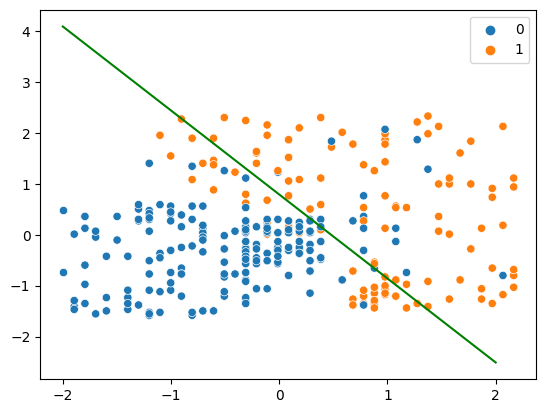

In [25]:
w = classifier.coef_[0]           # w consists of 2 elements
b = classifier.intercept_[0]      # b consists of 1 element
x_points = nm.linspace(-2, 2)    # generating x-points from -1 to 1
y_points = -(w[0] / w[1]) * x_points - b / w[1]
y_pred= classifier.predict(x_test) 
sns.scatterplot(x=x_train[:,0],y=x_train[:,1],hue=y_train)
sns.lineplot(x=x_points,y=y_points,color='g')

<AxesSubplot:>

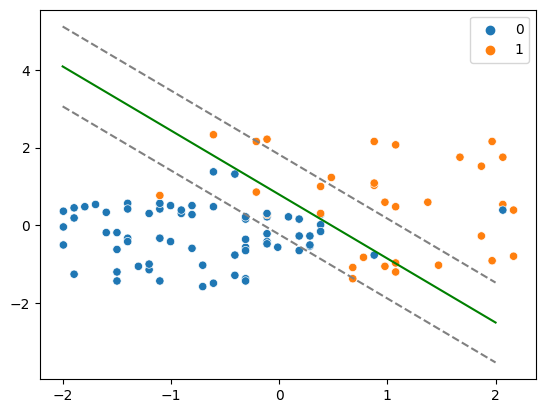

In [28]:
sns.scatterplot(x=x_test[:,0],y=x_test[:,1],hue=y_test)
sns.lineplot(x=x_points,y=y_points,color='g')
y_points1 = -(w[0] / w[1]) * x_points - b / w[1] -(1/w[1])
y_points2 = -(w[0] / w[1]) * x_points - b / w[1] +(1/w[1])
sns.lineplot(x=x_points,y=y_points2,color='grey',linestyle='--')
sns.lineplot(x=x_points,y=y_points1,color='grey',linestyle='--')

<AxesSubplot:>

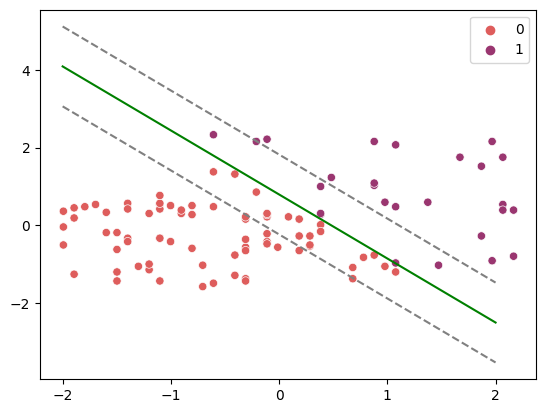

In [27]:


sns.lineplot(x=x_points,y=y_points,color='g')
sns.scatterplot(x=x_test[:,0],y=x_test[:,1],hue=y_pred,palette='flare')
#margin lines equations
y_points1 = -(w[0] / w[1]) * x_points - b / w[1] -(1/w[1])
y_points2 = -(w[0] / w[1]) * x_points - b / w[1] +(1/w[1])
sns.lineplot(x=x_points,y=y_points2,color='grey',linestyle='--')
sns.lineplot(x=x_points,y=y_points1,color='grey',linestyle='--')
